In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [2]:
df = pd.read_excel('Resser_corrected.xlsx')

In [3]:
df.head()

,Marca temporal,Ã‚ge,Sexe,"1. Quels Ã©lÃ©ments suivants vous inciterez Ã recycler ? : [Objets matÃ©riels (nourriture, boissons, objets fonctionnels, etc.)]",1. Quels Ã©lÃ©ments suivants vous inciterez Ã recycler ? : [Taxes (Ã©conomiques ou lÃ©gales)],"1. Quels Ã©lÃ©ments suivants vous inciterez Ã recycler ? : [Statut (rÃ©compenses, prix, visibilitÃ© dans votre communautÃ©)]",1. Quels Ã©lÃ©ments suivants vous inciterez Ã recycler ? : [Satisfaction environnementale],2. Recycleriez-vous le plastique diffÃ©remment en utilisant un point de collecte? :,3. Jusqu'oÃ¹ seriez-vous prÃªt Ã aller pour utiliser une installation de recyclage ? : [Votre maison],3. Jusqu'oÃ¹ seriez-vous prÃªt Ã aller pour utiliser une installation de recyclage ? : [Votre rue],...,"8. Le circuit de recyclage expÃ©rimentÃ© vous semble-t-il attractif ? (scanner le produit et obtenir des informations, savoir oÃ¹ se trouve le point de collecte le plus proche, obtenir des points en recyclant et les Ã©changer contre des avantages)",9. Savez-vous combien vous payez pour la collecte et le traitement de vos dÃ©chets d'emballage ?,10. Vous abonneriez-vous Ã un plan annuel payant pour obtenir ces fonctionnalitÃ©s et d'autres avantages ?,11. Pourquoi avez-vous participÃ© Ã notre expÃ©rience ? ( Vous pouvez cocher plus d'une option) : 1,11. Pourquoi avez-vous participÃ© Ã notre expÃ©rience ? ( Vous pouvez cocher plus d'une option) : 2,11. Pourquoi avez-vous participÃ© Ã notre expÃ©rience ? ( Vous pouvez cocher plus d'une option) : 3,11. Pourquoi avez-vous participÃ© Ã notre expÃ©rience ? ( Vous pouvez cocher plus d'une option) : 4,11. Pourquoi avez-vous participÃ© Ã notre expÃ©rience ? ( Vous pouvez cocher plus d'une option) : 5,"12. Selon l'expÃ©rience de l'application que vous venez de tester, Â¿Quelles autres fonctionnalitÃ©s vous sembleraient attractives dans une application comme celle-ci ?",otro
0,2024/06/06 4:11:18 p.Â m. EEST,50 - 60,Homme,5,4,3,5,Oui,5.0,5.0,...,Oui,Gratuit,Non,Par curiositÃ©,NaN,NaN,NaN,NaN,NaN,.
1,NaN,> 60,Femme,5,1,5,5,Non,NaN,NaN,...,Non,> 200 â‚¬ /an,Non,Par curiositÃ©,Pour le dÃ©sir de participer,Pour l'environnement,NaN,NaN,NaN,.
2,2024/06/06 4:48:17 p.Â m. EEST,> 60,Femme,5,1,5,5,Non,NaN,NaN,...,Non,> 200 â‚¬ /an,Non,Par curiositÃ©,Pour le dÃ©sir de participer,Pour l'environnement,NaN,NaN,NaN,.
3,2024/06/06 4:55:20 p.Â m. EEST,50 - 60,Femme,3,1,1,5,Oui,1.0,5.0,...,Non,50 â‚¬ / an,Non,Par curiositÃ©,NaN,NaN,NaN,NaN,NaN,.
4,2024/06/06 5:11:55 p.Â m. EEST,20 - 30,Femme,5,4,4,3,Oui,5.0,5.0,...,Oui,Gratuit,Oui,Par curiositÃ©,Pour la publicitÃ©,Pour le dÃ©sir de participer,NaN,NaN,Que el recolector me indique si mi clasificaci...,.


In [4]:
df.columns

Index(['Marca temporal', 'Ã‚ge', 'Sexe  ',
       '1. Quels Ã©lÃ©ments suivants vous inciterez Ã  recycler ? :  [Objets matÃ©riels (nourriture, boissons, objets fonctionnels, etc.)]',
       '1. Quels Ã©lÃ©ments suivants vous inciterez Ã  recycler ? :  [Taxes (Ã©conomiques ou lÃ©gales)]',
       '1. Quels Ã©lÃ©ments suivants vous inciterez Ã  recycler ? :  [Statut (rÃ©compenses, prix, visibilitÃ© dans votre communautÃ©)]',
       '1. Quels Ã©lÃ©ments suivants vous inciterez Ã  recycler ? :  [Satisfaction environnementale]',
       '2. Recycleriez-vous le plastique diffÃ©remment en utilisant un point de collecte? :  ',
       '3. Jusqu'oÃ¹ seriez-vous prÃªt Ã  aller pour utiliser une installation de recyclage ? :   [Votre maison]',
       '3. Jusqu'oÃ¹ seriez-vous prÃªt Ã  aller pour utiliser une installation de recyclage ? :   [Votre rue]',
       '3. Jusqu'oÃ¹ seriez-vous prÃªt Ã  aller pour utiliser une installation de recyclage ? :   [Votre quartier]',
       '3. Jusqu'oÃ¹ seriez-vo

In [5]:
columns_resser = [
    "Marca temporal",
    "Âge",
    "Sexe",
    "1. Quels éléments suivants vous inciterez à recycler ? : Objets matériels (nourriture, boissons, objets fonctionnels, etc.)",
    "1. Quels éléments suivants vous inciterez à recycler ? : Taxes (économiques ou légales)",
    "1. Quels éléments suivants vous inciterez à recycler ? : Statut (récompenses, prix, visibilité dans votre communauté)",
    "1. Quels éléments suivants vous inciterez à recycler ? : Satisfaction environnementale",
    "2. Recycleriez-vous le plastique différemment en utilisant un point de collecte?",
    "3. Jusqu'où seriez-vous prêt à aller pour utiliser une installation de recyclage ? : Votre maison",
    "3. Jusqu'où seriez-vous prêt à aller pour utiliser une installation de recyclage ? : Votre rue",
    "3. Jusqu'où seriez-vous prêt à aller pour utiliser une installation de recyclage ? : Votre quartier",
    "3. Jusqu'où seriez-vous prêt à aller pour utiliser une installation de recyclage ? : Un quartier proche",
    "3. Jusqu'où seriez-vous prêt à aller pour utiliser une installation de recyclage ? : Un quartier éloigné",
    "4. Pourquoi recyclez-vous ?  (Vous pouvez cocher plus d'une option) : 1",
    "4. Pourquoi recyclez-vous ?  (Vous pouvez cocher plus d'une option) : 2",
    "4. Pourquoi recyclez-vous ?  (Vous pouvez cocher plus d'une option) : 3",
    "4. Pourquoi recyclez-vous ?  (Vous pouvez cocher plus d'une option) : 4",
    "4. Pourquoi recyclez-vous ?  (Vous pouvez cocher plus d'une option) : 5",
    "4. Pourquoi recyclez-vous ?  (Vous pouvez cocher plus d'une option) : 6",
    "5. À votre avis, les éléments suivants ont-ils amélioré votre perception du recyclage ? : L'élément incitatif",
    "5. À votre avis, les éléments suivants ont-ils amélioré votre perception du recyclage ? : La publicité",
    "5. À votre avis, les éléments suivants ont-ils amélioré votre perception du recyclage ? : La disponibilité des points de collecte",
    "5. À votre avis, les éléments suivants ont-ils amélioré votre perception du recyclage ? : Le fait de connaître le résultat du recyclage",
    "6. Veuillez indiquer dans quelle mesure vous êtes d'accord avec les phrases suivantes : Je trouve l'idée de recycler agréable",
    "6. Veuillez indiquer dans quelle mesure vous êtes d'accord avec les phrases suivantes : Je considère que le recyclage vaut le temps qu'il prend",
    "6. Veuillez indiquer dans quelle mesure vous êtes d'accord avec les phrases suivantes : Je pense que le recyclage a du sens",
    "6. Veuillez indiquer dans quelle mesure vous êtes d'accord avec les phrases suivantes : Je pense que le recyclage est une perte de temps",
    "7. Pensez-vous que les éléments suivants pourraient améliorer la perception du recyclage dans votre communauté ? : L'élément incitatif",
    "7. Pensez-vous que les éléments suivants pourraient améliorer la perception du recyclage dans votre communauté ? : La publicité",
    "7. Pensez-vous que les éléments suivants pourraient améliorer la perception du recyclage dans votre communauté ? : La disponibilité des points de collecte",
    "7. Pensez-vous que les éléments suivants pourraient améliorer la perception du recyclage dans votre communauté ? : Le fait de connaître le résultat du recyclage",
    "8. Le circuit de recyclage expérimenté vous semble-t-il attractif ? (scanner le produit et obtenir des informations, savoir où se trouve le point de collecte le plus proche, obtenir des points en recyclant et les échanger contre des avantages)",
    "9.  Savez-vous combien vous payez pour la collecte et le traitement de vos déchets d'emballage ?",
    "10. Vous abonneriez-vous à un plan annuel payant pour obtenir ces fonctionnalités et d'autres avantages ?",
    "11. Pourquoi avez-vous participÃ© Ã  notre expÃ©rience ?  ( Vous pouvez cocher plus d'une option) : 1",
    "11. Pourquoi avez-vous participÃ© Ã  notre expÃ©rience ?  ( Vous pouvez cocher plus d'une option) : 2",
    "11. Pourquoi avez-vous participÃ© Ã  notre expÃ©rience ?  ( Vous pouvez cocher plus d'une option) : 3",
    "11. Pourquoi avez-vous participÃ© Ã  notre expÃ©rience ?  ( Vous pouvez cocher plus d'une option) : 4",
    "11. Pourquoi avez-vous participÃ© Ã  notre expÃ©rience ?  ( Vous pouvez cocher plus d'une option) : 5",
    "12. Selon l'expérience de l'application que vous venez de tester, ¿Quelles autres fonctionnalités vous sembleraient attractives dans une application comme celle-ci ?",
    "Otro"
]

In [6]:
df.columns = columns_resser

In [7]:
# Colores personalizados ampliados
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#76D7C4', '#F7DC6F']

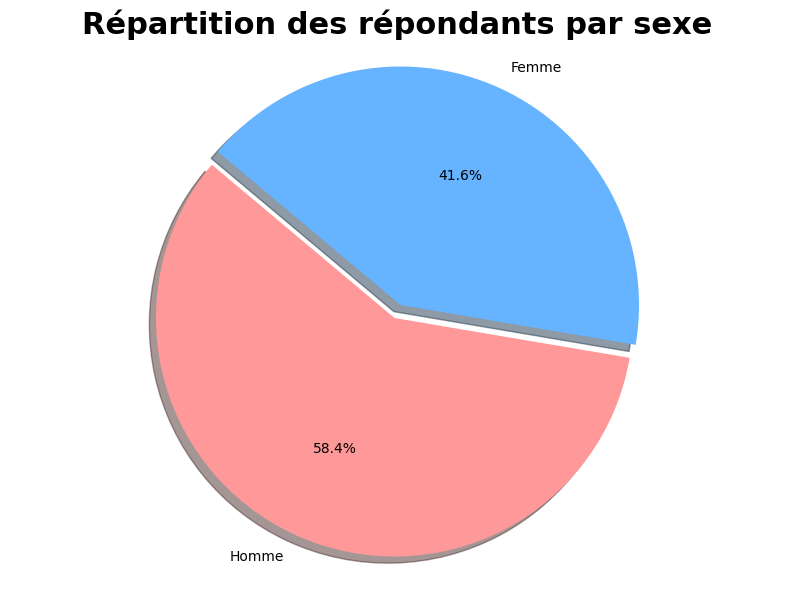

In [8]:
# Gráfico de pizza para 'Sexe'
plt.figure(figsize=(10, 7))
sex_counts = df['Sexe'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, explode=(0.06, 0))
plt.title('Répartition des répondants par sexe', fontsize=22, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

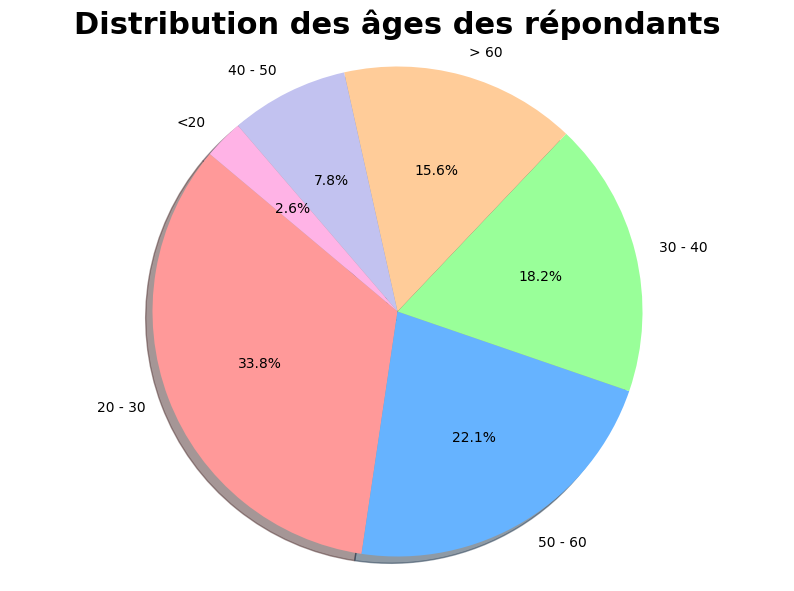

In [9]:
# Gráfico de pizza para 'Âge'
plt.figure(figsize=(10, 7))
age_counts = df['Âge'].value_counts()
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title('Distribution des âges des répondants', fontsize=22, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [10]:
def grafico_distribucion(df):
  # Guardamos la pregunta
  pregunta = df.columns[0].split(":")[0]
  title = '\n'.join(textwrap.wrap(pregunta, 95))

  # Cambiamos el nombre de las columnas
  df.columns = [column.split(":")[1].strip("  ") for column in df.columns]
  # Contar la cantidad de respuestas para cada puntuación
  counts = pd.DataFrame()
  for col in df.columns:
      counts[col] = df[col].value_counts().sort_index()

  counts = counts.fillna(0)  # Rellenar los valores NaN con 0
  counts = counts.T  # Transponer el DataFrame para facilitar la gráfica

  # Ajustar las etiquetas largas
  labels = [ '\n'.join(textwrap.wrap(label, 20)) for label in counts.index ]

  # Colores personalizados
  colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

  # Crear el gráfico de barras
  fig, ax = plt.subplots(figsize=(14, 8))
  bar_width = 0.15
  index = range(len(counts))

  for i, score in enumerate(counts.columns):
      plt.bar([p + bar_width*i for p in index],
              counts[score],
              bar_width,
              alpha=0.7,
              color=colors[i],
              label=score)

  plt.ylabel('Fréquence', fontsize=16)
  plt.title(title, fontsize=22, fontweight='bold')
  plt.xticks([p + 3 * bar_width for p in index], labels, ha='right', fontsize=14)
  plt.legend(title="d'accord", bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.grid(axis='y', linestyle='--', alpha=0.3)
  plt.tight_layout()

  plt.show()

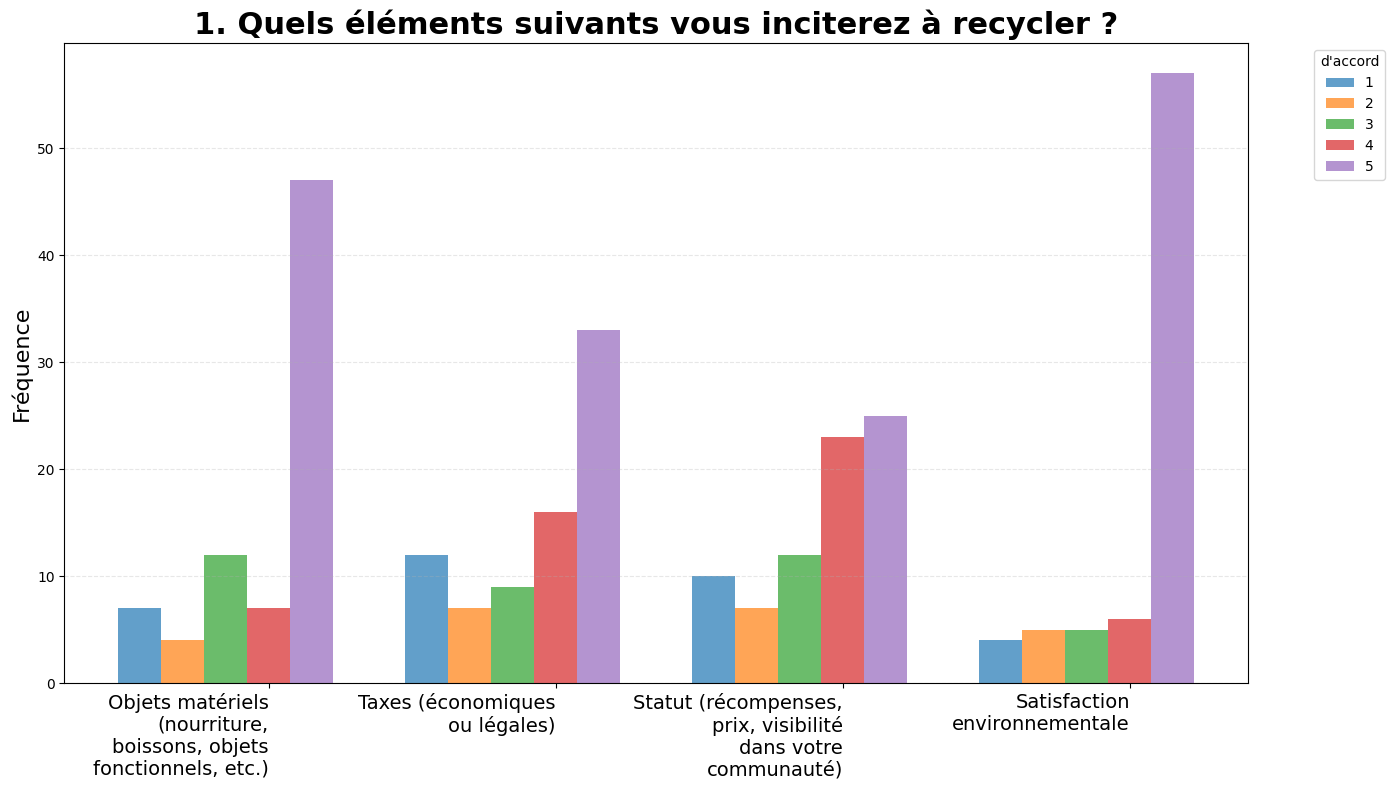

In [11]:
resser_1 = df.loc[:,"1. Quels éléments suivants vous inciterez à recycler ? : Objets matériels (nourriture, boissons, objets fonctionnels, etc.)":"1. Quels éléments suivants vous inciterez à recycler ? : Satisfaction environnementale"]
grafico_distribucion(resser_1)

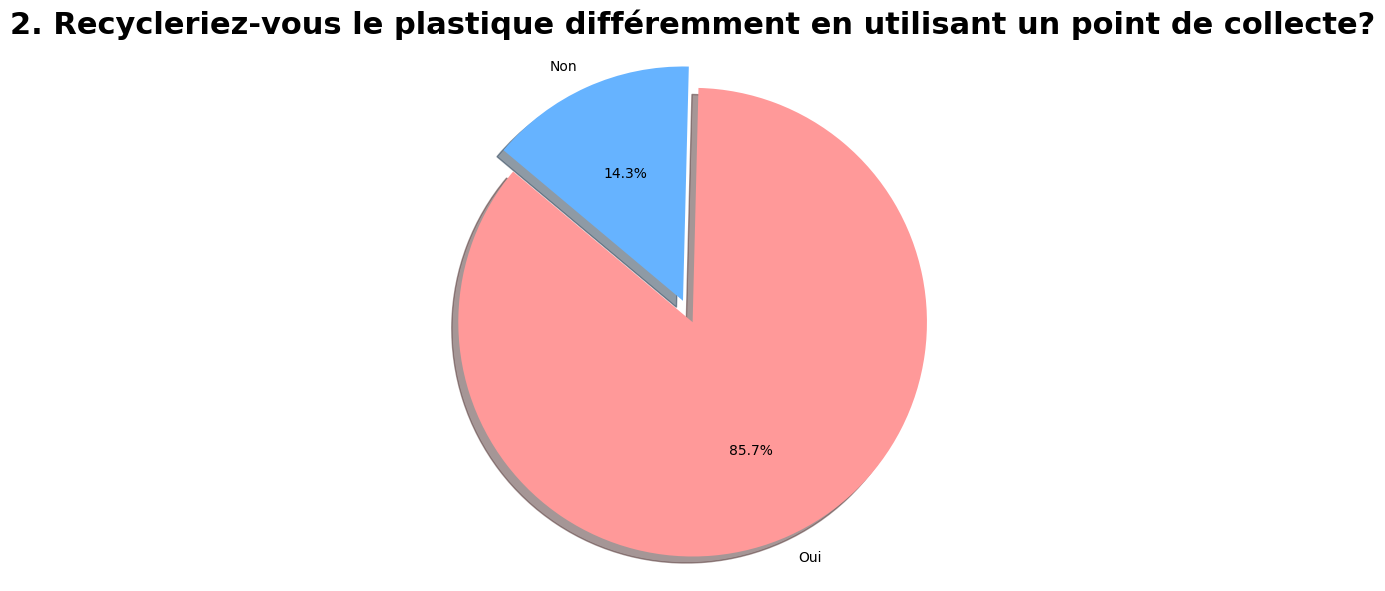

In [12]:
resser_2 = df["2. Recycleriez-vous le plastique différemment en utilisant un point de collecte?"]

# Gráfico de pizza para 'Âge'
plt.figure(figsize=(10, 7))
age_counts = resser_2.value_counts()
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, explode=(0.1, 0))
plt.title('2. Recycleriez-vous le plastique différemment en utilisant un point de collecte?', fontsize=22, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

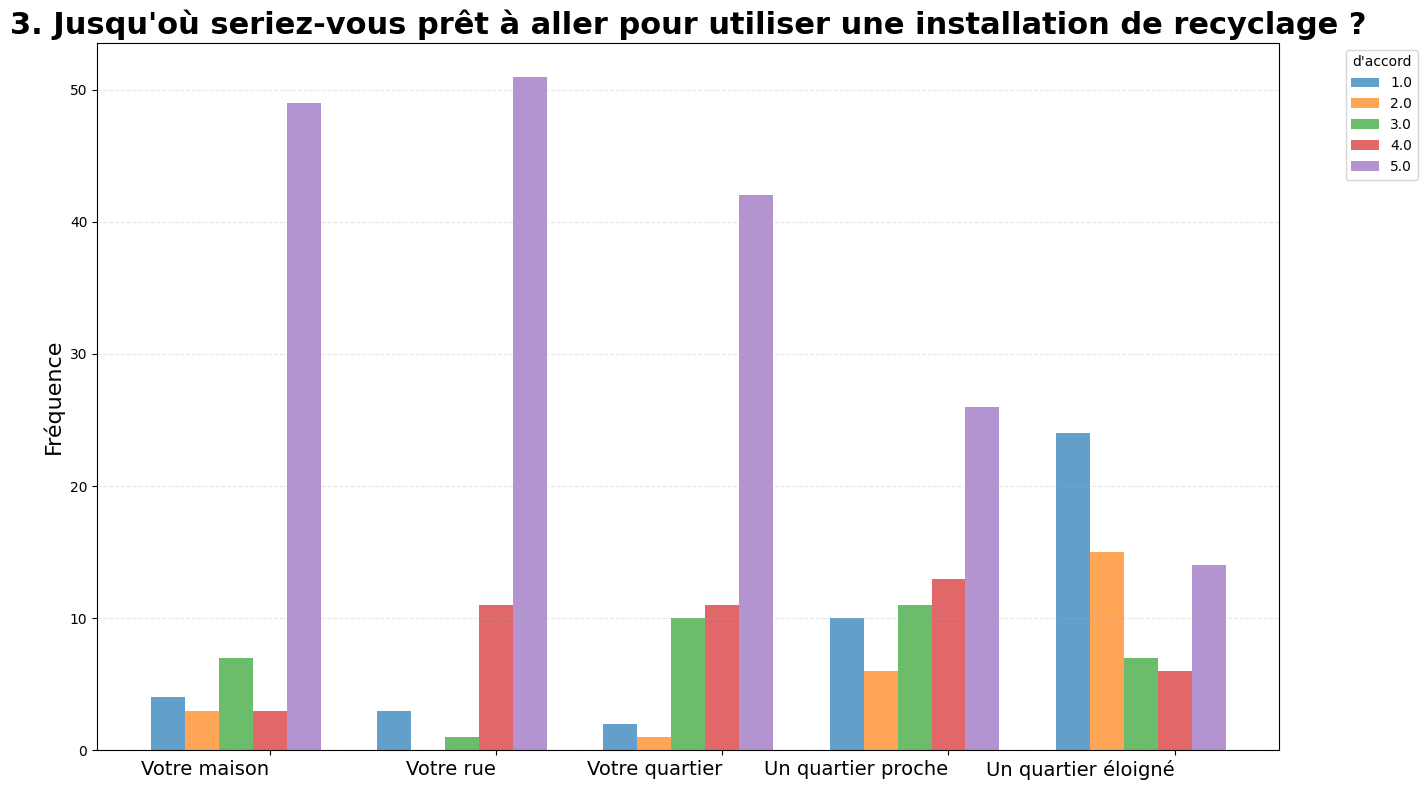

In [13]:
resser_3 = df.loc[:, "3. Jusqu'où seriez-vous prêt à aller pour utiliser une installation de recyclage ? : Votre maison": "3. Jusqu'où seriez-vous prêt à aller pour utiliser une installation de recyclage ? : Un quartier éloigné" ]
grafico_distribucion(resser_3)

In [14]:
resser_4 = df.loc[:,"4. Pourquoi recyclez-vous ?  (Vous pouvez cocher plus d'une option) : 1": "4. Pourquoi recyclez-vous ?  (Vous pouvez cocher plus d'une option) : 6"]
resser_4

,4. Pourquoi recyclez-vous ? (Vous pouvez cocher plus d'une option) : 1,4. Pourquoi recyclez-vous ? (Vous pouvez cocher plus d'une option) : 2,4. Pourquoi recyclez-vous ? (Vous pouvez cocher plus d'une option) : 3,4. Pourquoi recyclez-vous ? (Vous pouvez cocher plus d'une option) : 4,4. Pourquoi recyclez-vous ? (Vous pouvez cocher plus d'une option) : 5,4. Pourquoi recyclez-vous ? (Vous pouvez cocher plus d'une option) : 6
0,Pour protÃ©ger l'environnement,Pour rÃ©duire la quantitÃ© de dÃ©chets dans le...,Pour Ã©conomiser les ressources naturelles,NaN,NaN,NaN
1,Pour protÃ©ger l'environnement,Pour rÃ©duire la quantitÃ© de dÃ©chets dans le...,Pour Ã©conomiser les ressources naturelles,Pour contribuer Ã la durabilitÃ©,Pour des raisons Ã©conomiques (Ã©conomies d'ar...,NaN
2,Pour protÃ©ger l'environnement,Pour rÃ©duire la quantitÃ© de dÃ©chets dans le...,Pour Ã©conomiser les ressources naturelles,Pour contribuer Ã la durabilitÃ©,Pour des raisons Ã©conomiques (Ã©conomies d'ar...,NaN
3,Pour protÃ©ger l'environnement,Pour rÃ©duire la quantitÃ© de dÃ©chets dans le...,Pour Ã©conomiser les ressources naturelles,NaN,NaN,NaN
4,Pour protÃ©ger l'environnement,Pour Ã©conomiser les ressources naturelles,Pour contribuer Ã la durabilitÃ©,NaN,NaN,NaN
...,...,...,...,...,...,...
72,Pour protÃ©ger l'environnement,Pour rÃ©duire la quantitÃ© de dÃ©chets dans le...,Pour Ã©conomiser les ressources naturelles,Pour contribuer Ã la durabilitÃ©,Pour des raisons Ã©conomiques (Ã©conomies d'ar...,NaN
73,Pour protÃ©ger l'environnement,Pour rÃ©duire la quantitÃ© de dÃ©chets dans le...,Pour Ã©conomiser les ressources naturelles,Pour contribuer Ã la durabilitÃ©,NaN,NaN
74,Pour Ã©conomiser les ressources naturelles,Pour contribuer Ã la durabilitÃ©,NaN,NaN,NaN,NaN
75,Pour protÃ©ger l'environnement,Pour rÃ©duire la quantitÃ© de dÃ©chets dans le...,Pour Ã©conomiser les ressources naturelles,NaN,NaN,NaN


In [15]:
resser_4.columns

Index(['4. Pourquoi recyclez-vous ?  (Vous pouvez cocher plus d'une option) : 1',
       '4. Pourquoi recyclez-vous ?  (Vous pouvez cocher plus d'une option) : 2',
       '4. Pourquoi recyclez-vous ?  (Vous pouvez cocher plus d'une option) : 3',
       '4. Pourquoi recyclez-vous ?  (Vous pouvez cocher plus d'une option) : 4',
       '4. Pourquoi recyclez-vous ?  (Vous pouvez cocher plus d'une option) : 5',
       '4. Pourquoi recyclez-vous ?  (Vous pouvez cocher plus d'une option) : 6'],
      dtype='object')

In [16]:
resser_4_complete = pd.DataFrame()

for col in resser_4.columns:
  resser_4_complete = pd.concat([resser_4_complete, resser_4[col]], axis=0)

resser_4_complete.reset_index(drop=True, inplace=True)
resser_4_complete.columns = ['Catégorie']

In [17]:
resser_4_complete.replace("Pour protÃ©ger l'environnement", "Pour protéger l'environnement", inplace=True)
resser_4_complete.replace("Pour Ã©conomiser les ressources naturelles", "Pour économiser les ressources naturelles", inplace=True)
resser_4_complete.replace("Pour rÃ©duire la quantitÃ© de dÃ©chets dans les dÃ©charges", "Pour réduire la quantité de déchets dans les décharges", inplace=True)
resser_4_complete.replace("Pour contribuer Ã  la durabilitÃ©", "Pour contribuer à la durabilité", inplace=True)
resser_4_complete.replace("Pour des raisons Ã©conomiques (Ã©conomies d'argent  gÃ©nÃ©ration de revenus)", "Pour des raisons économiques (économies d'argent, génération de revenus)", inplace=True)

In [18]:
resser_4_complete['Catégorie'].value_counts()

Catégorie
Pour protéger l'environnement                                               69
Pour économiser les ressources naturelles                                   55
Pour réduire la quantité de déchets dans les décharges                      54
Pour contribuer Ã  la durabilitÃ©                                           51
Pour des raisons économiques (économies d'argent, génération de revenus)    26
Je ne recycle pas                                                            1
Name: count, dtype: int64

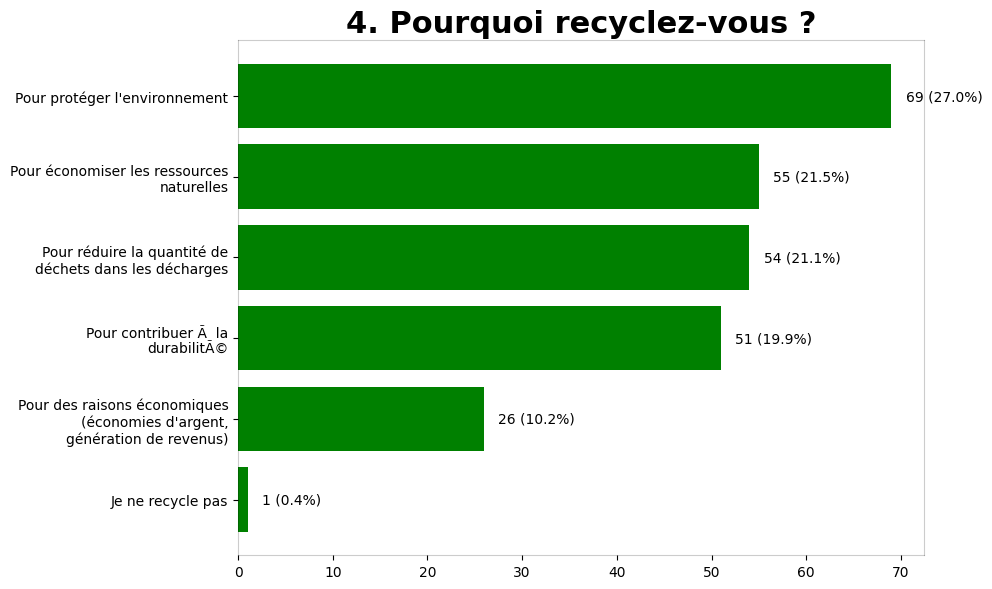

In [19]:
# Obtenemos los conteos
value_counts = resser_4_complete['Catégorie'].value_counts()

# Calculamos los porcentajes
total_responses = value_counts.sum()
percentages = (value_counts / total_responses) * 100

# Ajustar las etiquetas largas
wrapped_labels = ['\n'.join(textwrap.wrap(label, 30)) for label in value_counts.index]

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(wrapped_labels, value_counts, color='green')

# Añadir las anotaciones
for bar, value, percentage in zip(bars, value_counts, percentages):
    plt.text(bar.get_width() + 1.5, bar.get_y() + bar.get_height() / 2, f'{value} ({percentage:.1f}%)', va='center', fontsize=10)

plt.title('4. Pourquoi recyclez-vous ?', fontsize=22, fontweight='bold')
plt.gca().invert_yaxis()  # Invertir el eje y para que el valor más alto esté en la parte superior
plt.tight_layout()

# Ajustar el borde del gráfico con opacidad
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_alpha(0.2)  # Ajusta este valor para mayor o menor transparencia

plt.show()

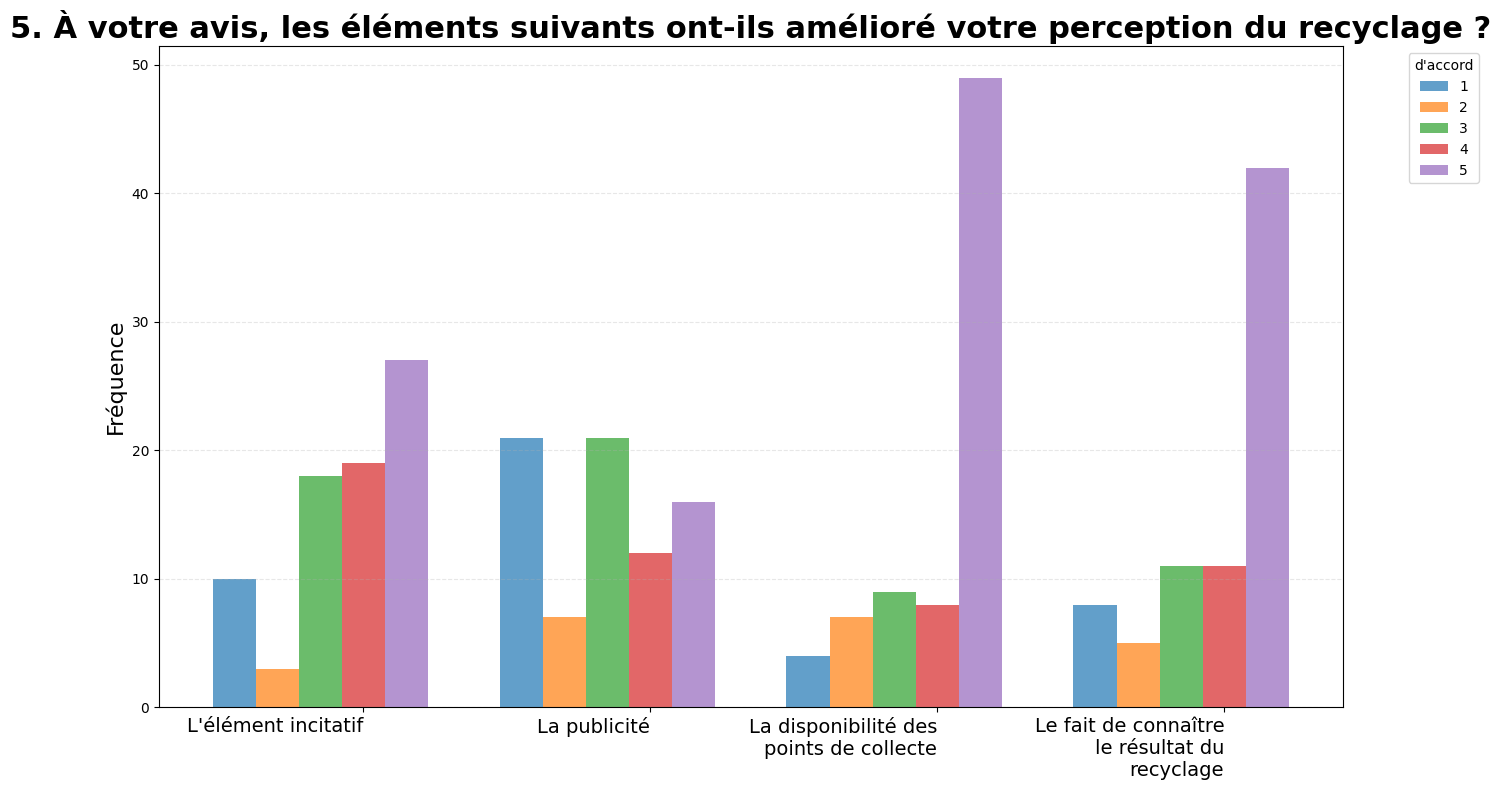

In [20]:
resser_5 = df.loc[:,"5. À votre avis, les éléments suivants ont-ils amélioré votre perception du recyclage ? : L'élément incitatif": "5. À votre avis, les éléments suivants ont-ils amélioré votre perception du recyclage ? : Le fait de connaître le résultat du recyclage"]
grafico_distribucion(resser_5)

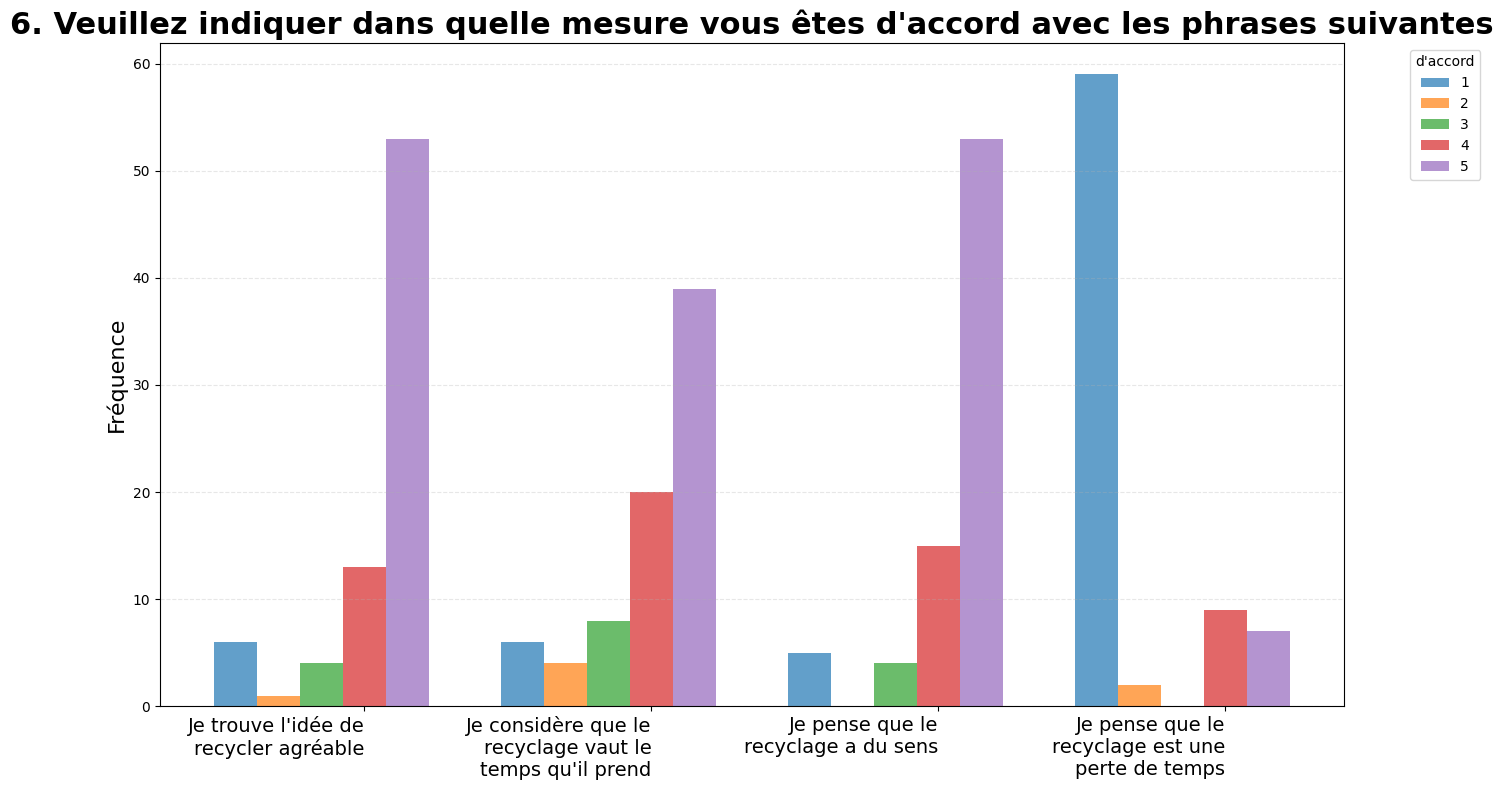

In [21]:
resser_6 = df.loc[:,"6. Veuillez indiquer dans quelle mesure vous êtes d'accord avec les phrases suivantes : Je trouve l'idée de recycler agréable": "6. Veuillez indiquer dans quelle mesure vous êtes d'accord avec les phrases suivantes : Je pense que le recyclage est une perte de temps"]
grafico_distribucion(resser_6)

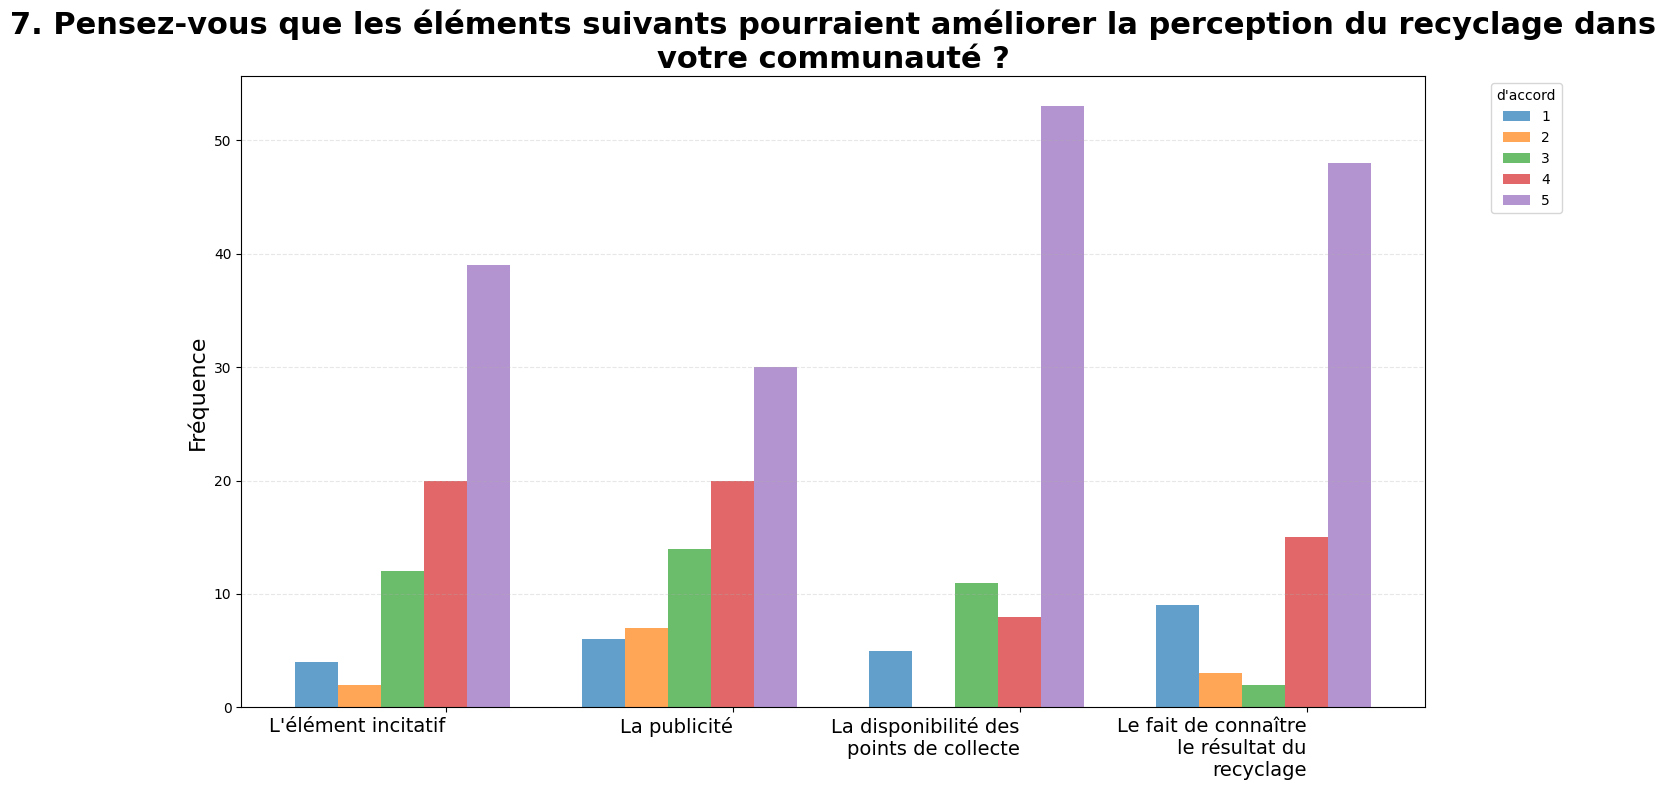

In [22]:
resser_7 = df.loc[:,"7. Pensez-vous que les éléments suivants pourraient améliorer la perception du recyclage dans votre communauté ? : L'élément incitatif":"7. Pensez-vous que les éléments suivants pourraient améliorer la perception du recyclage dans votre communauté ? : Le fait de connaître le résultat du recyclage"]
grafico_distribucion(resser_7)

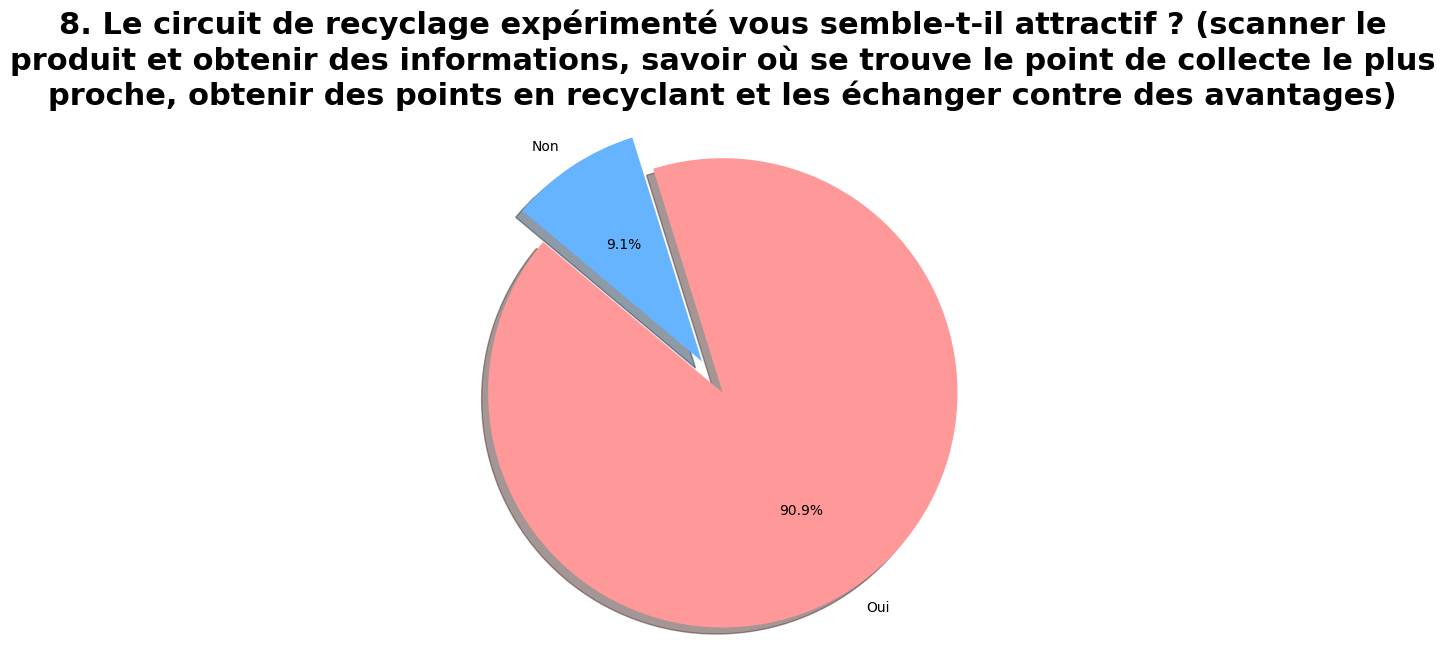

In [23]:
resser_8 = df["8. Le circuit de recyclage expérimenté vous semble-t-il attractif ? (scanner le produit et obtenir des informations, savoir où se trouve le point de collecte le plus proche, obtenir des points en recyclant et les échanger contre des avantages)"]
title_8 = '8. Le circuit de recyclage expérimenté vous semble-t-il attractif ? (scanner le produit et obtenir des informations, savoir où se trouve le point de collecte le plus proche, obtenir des points en recyclant et les échanger contre des avantages)'

new_title_8 = '\n'.join(textwrap.wrap(title_8, 85))

# Gráfico de pizza para 'Âge'
plt.figure(figsize=(10, 7))
resser_8_counts = resser_8.value_counts()
plt.pie(resser_8_counts, labels=resser_8_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, explode=(0.1, 0.06))
plt.title(new_title_8, fontsize=22, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [24]:
resser_9 = df["9.  Savez-vous combien vous payez pour la collecte et le traitement de vos déchets d'emballage ?"]
resser_9.unique()

array(['Gratuit', '> 200 â‚¬ /an', '50 â‚¬ / an', 'Je ne sais pas',
       '100â‚¬ - 200â‚¬ / an'], dtype=object)

In [25]:
resser_9.replace('> 200 â‚¬ /an', '> 200 € /an', inplace=True)
resser_9.replace('50 â‚¬ / an', '50 € / an', inplace=True)
resser_9.replace('100â‚¬ - 200â‚¬ / an','100€ - 200€ / an', inplace=True)

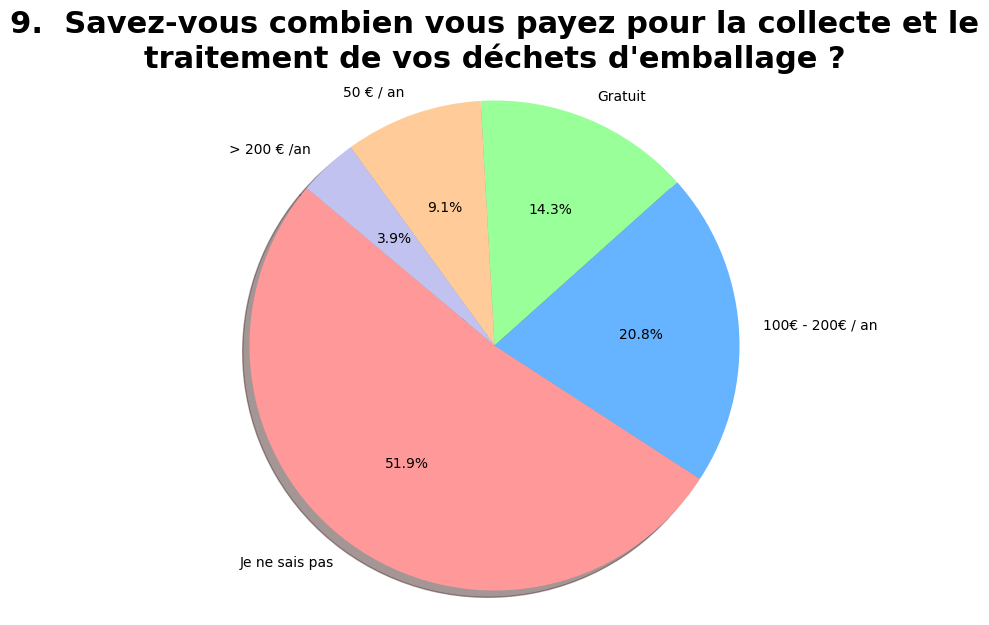

In [26]:
new_title_9 = '\n'.join(textwrap.wrap("9.  Savez-vous combien vous payez pour la collecte et le traitement de vos déchets d'emballage ?", 60))


# Gráfico de pizza para la pregunta 9
plt.figure(figsize=(10, 7))
age_counts = resser_9.value_counts()
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title(new_title_9, fontsize=22, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [27]:
resser_10 = df["10. Vous abonneriez-vous à un plan annuel payant pour obtenir ces fonctionnalités et d'autres avantages ?"]
resser_10.unique()

array(['Non', 'Oui',
       'Cela dÃ©pend du tarif et des avantages que cela offre',
       'Je pense que cela dÃ©pend du type de â€˜plan.',
       'DÃ©pends de la tarification ', 'Ne sais pas', 'DÃ©pend du prix ',
       'Prix', 'Ã‡a dÃ©pend ',
       'Ã‡a dÃ©pend de ce que me vole president Ã\xa0 la fin de lâ€™annÃ©e en argent'],
      dtype=object)

In [28]:
resser_10.replace("Cela dÃ©pend du tarif et des avantages que cela offre", "Cela dépend du tarif et des avantages que cela offre", inplace=True)
resser_10.replace("Je pense que cela dÃ©pend du type de â€˜plan.", "Je pense que cela dépend du type de‘plan.", inplace=True)
resser_10.replace("DÃ©pends de la tarification ", "Dépends de la tarification", inplace=True)
resser_10.replace("DÃ©pend du prix ", "Dépend du prix", inplace=True)
resser_10.replace("Ã‡a dÃ©pend ", "Ça dépend", inplace=True)
resser_10.replace("Ã‡a dÃ©pend de ce que me vole president Ã\xa0 la fin de lâ€™annÃ©e en argent", "Ça dépend de ce que me vole president à la fin de l'année en argent", inplace=True)

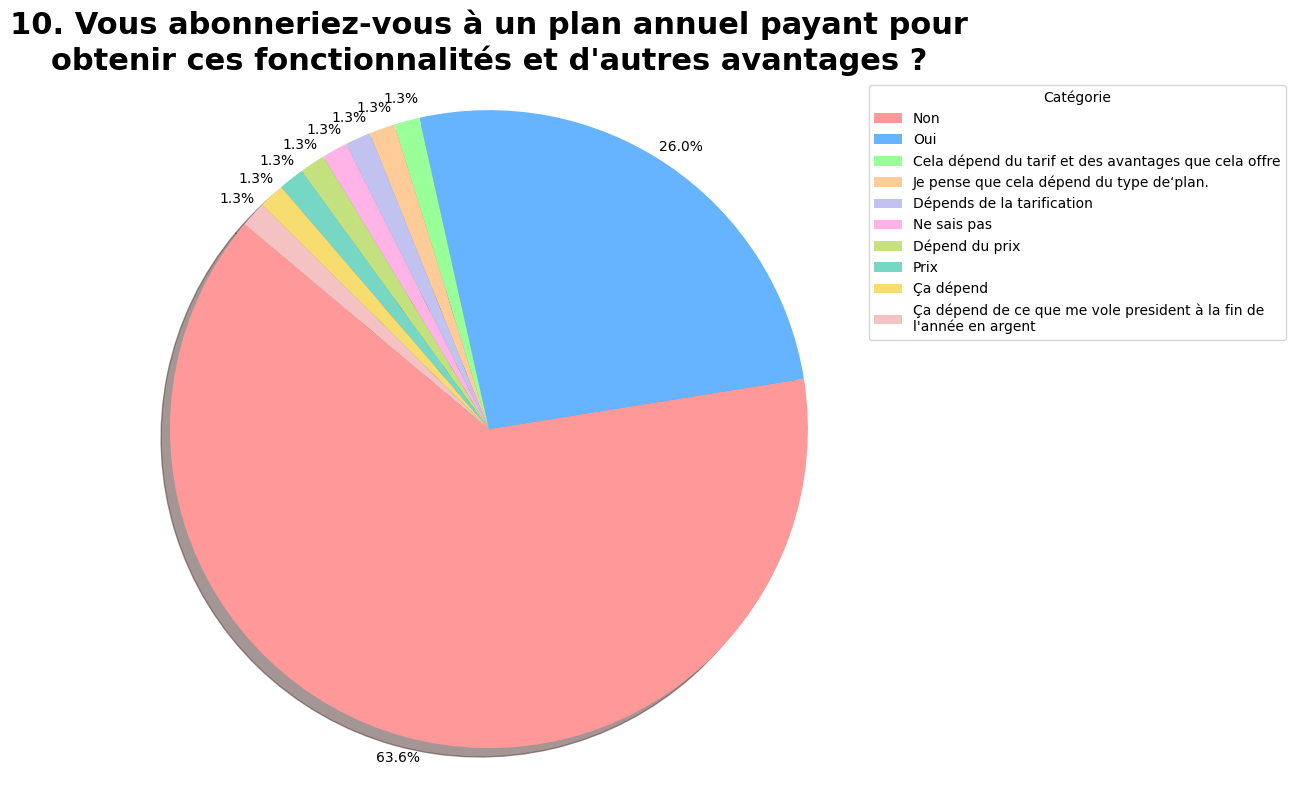

In [29]:
# Colores personalizados (asegúrate de tener suficientes colores para todas las categorías)
colores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#76D7C4', '#F7DC6F', '#f4c2c2', '#f5b7b1', '#aed6f1', '#f9e79f', '#fad7a0', '#abebc6']

# Gráfico de pizza para la pregunta 10
plt.figure(figsize=(12, 8))
age_counts = resser_10.value_counts()
wedges, texts, autotexts = plt.pie(age_counts, autopct='%1.1f%%', startangle=140, colors=colores, shadow=True, pctdistance=1.07, textprops={'fontsize': 10})


new_title_10 = '\n'.join(textwrap.wrap("10. Vous abonneriez-vous à un plan annuel payant pour obtenir ces fonctionnalités et d'autres avantages ?", 60))

# Título del gráfico
plt.title(new_title_10, fontsize=22, fontweight='bold')

# Añadir la leyenda
title_legend = ['\n'.join(textwrap.wrap(label, 55)) for label in age_counts.index]
plt.legend(wedges, title_legend, title="Catégorie", bbox_to_anchor=(1, 1), loc="best", fontsize=10)

# Asegurar que el gráfico tenga una proporción de aspecto igual para que sea un círculo
plt.axis('equal')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [30]:
resser_11 = df.loc[:,"11. Pourquoi avez-vous participÃ© Ã  notre expÃ©rience ?  ( Vous pouvez cocher plus d'une option) : 1":"11. Pourquoi avez-vous participÃ© Ã  notre expÃ©rience ?  ( Vous pouvez cocher plus d'une option) : 5"]
resser_11

,11. Pourquoi avez-vous participÃ© Ã notre expÃ©rience ? ( Vous pouvez cocher plus d'une option) : 1,11. Pourquoi avez-vous participÃ© Ã notre expÃ©rience ? ( Vous pouvez cocher plus d'une option) : 2,11. Pourquoi avez-vous participÃ© Ã notre expÃ©rience ? ( Vous pouvez cocher plus d'une option) : 3,11. Pourquoi avez-vous participÃ© Ã notre expÃ©rience ? ( Vous pouvez cocher plus d'une option) : 4,11. Pourquoi avez-vous participÃ© Ã notre expÃ©rience ? ( Vous pouvez cocher plus d'une option) : 5
0,Par curiositÃ©,NaN,NaN,NaN,NaN
1,Par curiositÃ©,Pour le dÃ©sir de participer,Pour l'environnement,NaN,NaN
2,Par curiositÃ©,Pour le dÃ©sir de participer,Pour l'environnement,NaN,NaN
3,Par curiositÃ©,NaN,NaN,NaN,NaN
4,Par curiositÃ©,Pour la publicitÃ©,Pour le dÃ©sir de participer,NaN,NaN
...,...,...,...,...,...
72,Par curiositÃ©,Pour la publicitÃ©,Pour le dÃ©sir de participer,Pour l'environnement,NaN
73,Par curiositÃ©,Pour l'environnement,NaN,NaN,NaN
74,Par curiositÃ©,NaN,NaN,NaN,NaN
75,Par curiositÃ©,Pour le cadeau,NaN,NaN,NaN


In [31]:
resser_11_complete = pd.DataFrame()

for col in resser_11.columns:
  resser_11_complete = pd.concat([resser_11_complete, resser_11[col]], axis = 0)

resser_11_complete.reset_index(drop=True, inplace=True)
resser_11_complete.columns = ['Catégorie']
resser_11_complete['Catégorie'].unique()

array(['Par curiositÃ©', 'Pour le dÃ©sir de participer', 'Pour le cadeau',
       "Pour l'environnement", nan, 'Pour la publicitÃ©'], dtype=object)

In [32]:
resser_11_complete.replace("Par curiositÃ©","Par curiosité",inplace=True)
resser_11_complete.replace("Pour le dÃ©sir de participer","Pour le désir de participer",inplace=True)
resser_11_complete.replace("Pour la publicitÃ©","Pour la publicité",inplace=True)

In [33]:
resser_11_complete.value_counts()

Catégorie                  
Par curiosité                  56
Pour le désir de participer    43
Pour l'environnement           38
Pour le cadeau                 13
Pour la publicité               7
Name: count, dtype: int64

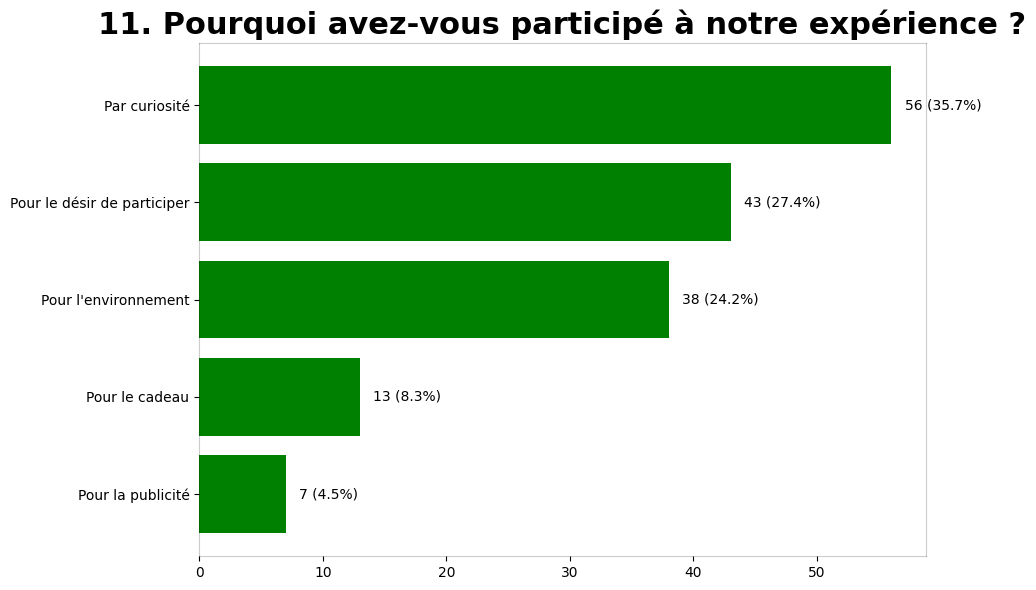

In [34]:
# Obtenemos los conteos
value_counts_11 = resser_11_complete['Catégorie'].value_counts()

# Calculamos los porcentajes
total_responses = value_counts_11.sum()
percentages = (value_counts_11 / total_responses) * 100

# Ajustar las etiquetas largas
wrapped_labels = ['\n'.join(textwrap.wrap(label, 30)) for label in value_counts_11.index]

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(wrapped_labels, value_counts_11, color='green')

# Añadir las anotaciones
for bar, value, percentage in zip(bars, value_counts_11, percentages):
    plt.text(bar.get_width() + 1.1, bar.get_y() + bar.get_height() / 2, f'{value} ({percentage:.1f}%)', va='center', fontsize=10)

plt.title('11. Pourquoi avez-vous participé à notre expérience ?', fontsize=22, fontweight='bold')
plt.gca().invert_yaxis()  # Invertir el eje y para que el valor más alto esté en la parte superior
plt.tight_layout()

# Ajustar el borde del gráfico con opacidad
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_alpha(0.2)  # Ajusta este valor para mayor o menor transparencia

plt.show()

In [36]:
from wordcloud import WordCloud

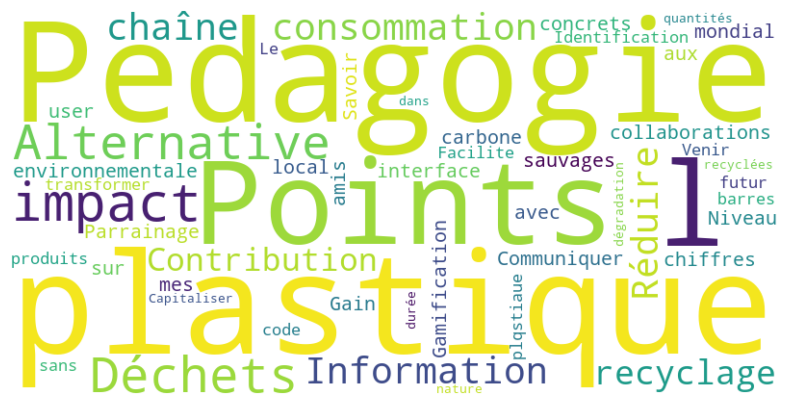

In [37]:
# Simulamos los datos de la columna con las opiniones de los usuarios
data = {
    'Opinions': [
        "Pedagogie",
        "Réduire consommation plastique",
        "Pedagogie",
        "Information chaîne recyclage",
        "Contribution environnementale avec chiffres concrets",
        "Parrainage",
        "Points collaborations",
        "Communiquer",
        "Savoir l’impact",
        "Niveau local-mondial",
        "Gamification in the user interface",
        "Gain sur l’impact carbone",
        "Déchets sauvages",
        "Points mes amis",
        "Alternatives aux plastiques",
        "Identification produits sans code barres",
        "Le futur déchets",
        "Venir transformer plqstiaue",
        "Facilite",
        "Capitaliser quantités recyclées",
        "Alternative, durée dégradation dans nature"
    ]
}

df_12 = pd.DataFrame(data)

# Concatenar todas las opiniones en un solo texto
text = ' '.join(df_12['Opinions'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', collocations=False).generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
df["10. Vous abonneriez-vous à un plan annuel payant pour obtenir ces fonctionnalités et d'autres avantages ?"].unique()

array(['Non', 'Oui',
       'Cela dépend du tarif et des avantages que cela offre',
       'Je pense que cela dépend du type de‘plan.',
       'Dépends de la tarification', 'Ne sais pas', 'Dépend du prix',
       'Prix', 'Ça dépend',
       "Ça dépend de ce que me vole president à la fin de l'année en argent"],
      dtype=object)

In [39]:
import scipy.stats as stats

# Convertimos las respuestas a categorías: "Non" como negativa y todo lo demás como no negativa
df['Respuesta_Categorizada'] = df["10. Vous abonneriez-vous à un plan annuel payant pour obtenir ces fonctionnalités et d'autres avantages ?"].apply(lambda x: 'Negativa' if x == 'Non' else 'No Negativa')

# Análisis de la relación con el sexo
tabla_sexo = pd.crosstab(df['Sexe'], df['Respuesta_Categorizada'])
chi2_sexo, p_sexo, _, _ = stats.chi2_contingency(tabla_sexo)

# Análisis de la relación con la edad
tabla_edad = pd.crosstab(df['Âge'], df['Respuesta_Categorizada'])
chi2_edad, p_edad, _, _ = stats.chi2_contingency(tabla_edad)

# Resultados
print("Relación con el sexo:")
print(tabla_sexo)
print(f"Chi-cuadrado: {chi2_sexo}, p-valor: {p_sexo}")

print("\nRelación con la edad:")
print(tabla_edad)
print(f"Chi-cuadrado: {chi2_edad}, p-valor: {p_edad}")

Relación con el sexo:
Respuesta_Categorizada  Negativa  No Negativa
Sexe                                         
Femme                         19           13
Homme                         30           15
Chi-cuadrado: 0.17235243055555544, p-valor: 0.6780295349776986

Relación con la edad:
Respuesta_Categorizada  Negativa  No Negativa
Âge                                          
20 - 30                       17            9
30 - 40                       12            2
40 - 50                        4            2
50 - 60                        9            8
<20                            0            2
> 60                           7            5
Chi-cuadrado: 7.493299242774033, p-valor: 0.1864606942050363


Relación con el Sexo:
- No existe una relación significativa entre el sexo y la disposición a suscribirse al plan anual (p > 0.05).

Relación con la Edad:
- No se encontró una relación significativa entre la edad y la disposición a suscribirse al plan anual (p > 0.05).


El análisis indicó que ni el sexo ni la edad de los encuestados influyen significativamente en su disposición a suscribirse a un plan anual pagado en la aplicación de reciclaje. Por lo tanto, no es necesario segmentar el modelo de negocio basado en estas características demográficas.
Este hallazgo sugiere que otros factores, como el valor percibido del plan, las ventajas ofrecidas, o la estructura de precios, podrían ser más determinantes en la decisión de suscripción. 
